# Milestone 1

## 1. Problematic

### Context

The film industry is one of the most influential and profitable entertainment sectors worldwide. Understanding movie trends, audience preferences, and financial performance is crucial for filmmakers, production companies, and marketers. This project aims to analyze a dataset spanning over 60 years of cinematic history, providing insights into key movie characteristics, financial success, and audience reception.

### Why This Subject?

The movie industry has evolved significantly over the decades, with changes in genres, production budgets, audience expectations, and technological advancements. By analyzing historical data, we can identify trends in movie success factors through a central question:

***With success in cinema being measured through multiple lenses—audience reception, box office revenue, and industry recognition—what are the key factors influencing these metrics, and how have they evolved over the decades?***

### Objectives

The main goals of this project are:

- Analyze key characteristics (e.g. genre, duration, budget...) and their impact on a movie’s performance
- Compare various success metrics, including box office revenue, IMDb ratings, and awards to identify key pattern 
- Study how success factors have evolved over time, highlighting shifts in audience preferences, filmmaking styles, and industry standards

## 2. Dataset

The dataset we selected from Kaggle, [IMDB Movies From 1960 to 2024](https://www.kaggle.com/datasets/raedaddala/imdb-movies-from-1960-to-2023), provides annual data on budget, worldwide gross, duration, IMDb rating, and more for the most popular 500–600 movies per year from 1960 to 2024, extracted from IMDb. It includes over 30,000 movies spanning more than 60 years.

## 3. Exploratory Data Analysis

### Load and clean the data

The data is stored in a GitHub repository, organized into folders where each folder "X" contains movies from the year "X"

In [46]:
import pandas as pd
import re
import numpy as np

In [5]:
github_rep_url = "https://raw.githubusercontent.com/RaedAddala/Scraping-IMDB/master/Data/"

In [97]:
years = range(1960, 2025)

df_list = []

for year in years:
    file_name = f"merged_movies_data_{year}.csv"
    folder_name = f"{year}"
    file_url = github_rep_url + folder_name + "/" + file_name
    df = pd.read_csv(file_url)
    df_list.append(df)

In [250]:
# Concatenate all DataFrames in the list into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  33600 non-null  object 
 1   Movie Link             33600 non-null  object 
 2   Year                   33600 non-null  int64  
 3   Duration               33379 non-null  object 
 4   MPA                    25624 non-null  object 
 5   Rating                 33462 non-null  float64
 6   Votes                  33462 non-null  object 
 7   budget                 11815 non-null  float64
 8   grossWorldWide         18222 non-null  float64
 9   gross_US_Canada        17571 non-null  float64
 10  opening_weekend_Gross  15523 non-null  float64
 11  directors              33600 non-null  object 
 12  writers                33600 non-null  object 
 13  stars                  33600 non-null  object 
 14  genres                 33600 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,1. Swiss Family Robinson,https://www.imdb.com/title/tt0054357/?ref_=sr_t_1,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,2. Psycho,https://www.imdb.com/title/tt0054215/?ref_=sr_t_2,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,3. The Apartment,https://www.imdb.com/title/tt0053604/?ref_=sr_t_3,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,4. Spartacus,https://www.imdb.com/title/tt0054331/?ref_=sr_t_4,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,5. Breathless,https://www.imdb.com/title/tt0053472/?ref_=sr_t_5,1960,1h 30m,Not Rated,7.7,90K,400000.0,594039.0,414173.0,...,"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...","['Caper', 'Crime', 'Drama']",['France'],"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,1960.0


In [251]:
#Rename de colums for consistency 

rename_dict = {
    'Title': 'title',
    'Movie Link': 'movie_link',
    'Year': 'year',
    'Duration': 'duration',
    'MPA': 'mpa_rating',
    'Rating': 'rating',
    'Votes': 'votes',
    'budget': 'budget',
    'grossWorldWide': 'gross_worldwide',
    'gross_US_Canada': 'gross_us_canada',
    'opening_weekend_Gross': 'opening_weekend_gross',
    'directors': 'directors',
    'writers': 'writers',
    'stars': 'stars',
    'genres': 'genres',
    'countries_origin': 'countries_origin',
    'filming_locations': 'filming_locations',
    'production_companies': 'production_companies',
    'Languages': 'languages',
    'wins': 'wins',
    'nominations': 'nominations',
    'oscars': 'oscars',
    'release_date': 'release_date'
}

# Apply renaming
merged_df.rename(columns=rename_dict, inplace=True)

In [252]:
# Check for duplicate movie and keep only the first occurrence 
merged_df = merged_df.drop_duplicates(subset=['movie_link'], keep='first')

#Clean the Title column: remove leading numbers and trim whitespace
merged_df['title'] = merged_df['title'].apply(lambda x: re.sub(r'^\d+\.\s*', '', str(x)).strip())

#Drop relase_date colum because the colums year contains already all the information we need
merged_df = merged_df.drop(columns=['release_date'])

In [253]:
#Convert vote to float

def convert_votes(vote_str):
    if isinstance(vote_str, str):  # Ensure it's a string before processing
        match = re.match(r'(\d+)([KkM]?)', vote_str)
        if match:
            num = int(match.group(1))
            multiplier = match.group(2).lower()
            if multiplier == 'k':  
                return num * 1000
            elif multiplier == 'm':  
                return num * 1000000
            return num 
    return None 

# Apply conversion function
merged_df['votes_K'] = merged_df['votes'].apply(convert_votes) / 1000  

# Drop the old 'votes' column
merged_df.drop(columns=['votes'], inplace=True)

In [254]:
#Convert duration to minutes 
def convert_duration(duration):
    if not (pd.isna(duration) or duration.strip() == ""):
        match = re.match(r'(\d+)h (\d+)m', duration)
        if match:  # Fix indentation here
            hours = int(match.group(1)) * 60  # Convert hours to minutes
            minutes = int(match.group(2))  # Extract minutes
            return hours + minutes
    return None 

# Apply conversion function
merged_df['duration_min'] = merged_df['duration'].apply(convert_duration)

In [255]:
#Group genres

genre_mapping = {
    'Drama': ['Drama', 'Period Drama', 'Tragedy', 'Psychological Drama', 'Political Drama', 'Medical Drama', 'Legal Drama', 'Prison Drama', 'Showbiz Drama', 'Workplace Drama'],
    'Comedy': ['Comedy', 'Slapstick', 'Parody', 'Satire', 'Dark Comedy', 'Raunchy Comedy', 'Quirky Comedy', 'Teen Comedy', 'Buddy Comedy', 'Body Swap Comedy', 'Screwball Comedy', 'Stoner Comedy', 'Sketch Comedy', 'Sitcom'],
    'Thriller': ['Thriller', 'Political Thriller', 'Psychological Thriller', 'Conspiracy Thriller', 'Suspense Mystery', 'Serial Killer', 'Legal Thriller', 'Spy'],
    'Action': ['Action', 'One-Person Army Action', 'Action Epic', 'Car Action', 'B-Action', 'Gun Fu', 'Kung Fu', 'Martial Arts', 'Desert Adventure', 'Swashbuckler'],
    'Crime': ['Crime', 'True Crime', 'Gangster', 'Drug Crime', 'Hard-boiled Detective', 'Police Procedural', 'Bumbling Detective'],
    'Horror': ['Horror', 'Slasher Horror', 'Psychological Horror', 'Supernatural Horror', 'Body Horror', 'Vampire Horror', 'Zombie Horror', 'Werewolf Horror', 'Monster Horror', 'B-Horror', 'Folk Horror', 'Giallo', 'Splatter Horror', 'Witch Horror', 'Found Footage Horror'],
    'Sci-Fi & Fantasy': ['Sci-Fi', 'Space Sci-Fi', 'Dystopian Sci-Fi', 'Cyberpunk', 'Artificial Intelligence', 'Time Travel', 'Fantasy', 'Dark Fantasy', 'Supernatural Fantasy', 'Sword & Sorcery', 'Kaiju', 'Sci-Fi Epic', 'Fantasy Epic', 'Cyber Thriller', 'Steampunk', 'Mecha'],
    'Romance': ['Romance', 'Romantic Comedy', 'Feel-Good Romance', 'Teen Romance', 'Steamy Romance', 'Tragic Romance', 'Romantic Epic', 'Dark Romance', 'Holiday Romance'],
    'Adventure': ['Adventure', 'Animal Adventure', 'Jungle Adventure', 'Urban Adventure', 'Teen Adventure', 'Globetrotting Adventure', 'Dinosaur Adventure', 'Sea Adventure', 'Mountain Adventure', 'Road Trip'],
    'Animation': ['Animation', 'Computer Animation', 'Hand-Drawn Animation', 'Stop Motion Animation', 'Adult Animation', 'Anime', 'Shōnen', 'Shōjo', 'Seinen', 'Josei', 'Holiday Animation'],
    'Musical & Music': ['Music', 'Musical', 'Rock Musical', 'Classic Musical', 'Jukebox Musical', 'Pop Musical', 'Concert', 'Music Documentary'],
    'War & History': ['War', 'History', 'War Epic', 'Historical Epic', 'Military Documentary', 'Sword & Sandal'],
    'Sports': ['Sport', 'Extreme Sport', 'Basketball', 'Football', 'Baseball', 'Boxing', 'Soccer', 'Motorsport', 'Water Sport'],
    'Documentary': ['Documentary', 'Docudrama', 'Sports Documentary', 'Faith & Spirituality Documentary', 'Political Documentary', 'Nature Documentary', 'Food Documentary', 'Science & Technology Documentary', 'History Documentary', 'Crime Documentary', 'Travel Documentary'],
    'Western': ['Western', 'Classical Western', 'Contemporary Western', 'Western Epic', 'Spaghetti Western'],
    'Miscellaneous': ['Reality TV', 'Game Show', 'Talk Show', 'Soap Opera', 'Mockumentary', 'News']
}

def map_genres(genre_list):
    general_genres = set()  
    for genre in genre_list:
        genre = genre.strip().lower()  
        for group, genres in genre_mapping.items():
            if genre in [g.lower() for g in genres]:  
                general_genres.add(group)  
    return list(general_genres) if general_genres else ['Other']

merged_df['genres'] = merged_df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

merged_df['genre_grouped'] = merged_df['genres'].apply(map_genres)

In [256]:
#Calcul of the ROI 
merged_df['ROI'] = merged_df.apply(
    lambda row: (row['gross_worldwide'] - row['budget']) / row['budget'] if pd.notna(row['gross_worldwide']) and pd.notna(row['budget']) and row['budget'] != 0 else None, 
    axis=1
)

In [257]:
#Replace empty arrays with None in specific columns
fields_to_check = ['directors', 'writers', 'stars', 'genres_grouped', 'countries_origin', 'filming_locations', 'production_companies', 'languages']
    
for field in fields_to_check:
    if field in merged_df.columns:
        # Replace empty arrays (i.e., '[]') with None
        merged_df[field] = merged_df[field].apply(lambda x: None if pd.isna(x) or x.strip() == '[]' else x)

merged_df.head()

,title,movie_link,year,duration,mpa_rating,rating,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,...,filming_locations,production_companies,languages,wins,nominations,oscars,votes_K,duration_min,genre_grouped,ROI
0,Swiss Family Robinson,https://www.imdb.com/title/tt0054357/?ref_=sr_t_1,1960,2h 6m,Approved,7.1,5000000.0,40357287.0,40356000.0,NaN,...,"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,19.0,126.0,[Adventure],7.071457
1,Psycho,https://www.imdb.com/title/tt0054215/?ref_=sr_t_2,1960,1h 49m,R,8.5,806947.0,32066835.0,32000000.0,NaN,...,"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,741.0,109.0,"[Thriller, Horror]",38.738465
2,The Apartment,https://www.imdb.com/title/tt0053604/?ref_=sr_t_3,1960,2h 5m,Approved,8.3,3000000.0,18778738.0,18600000.0,NaN,...,"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,204.0,125.0,"[Comedy, Romance, Drama]",5.259579
3,Spartacus,https://www.imdb.com/title/tt0054331/?ref_=sr_t_4,1960,3h 17m,PG-13,7.9,12000000.0,1846975.0,1830650.0,92162.0,...,"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,146.0,197.0,"[Adventure, War & History, Drama]",-0.846085
4,Breathless,https://www.imdb.com/title/tt0053472/?ref_=sr_t_5,1960,1h 30m,Not Rated,7.7,400000.0,594039.0,414173.0,32424.0,...,"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,90.0,90.0,"[Crime, Drama]",0.485098


In [258]:
merged_df.shape

(33600, 25)

In [259]:
output_path = "../data/final_dataset.csv"
merged_df.to_csv(output_path, index = False, sep =";")

### Scrapping to get the posters

In [203]:
# to do 

### Quality of the data set 

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\1148359266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df["Missing %"], y=missing_df["Column"], palette="viridis")


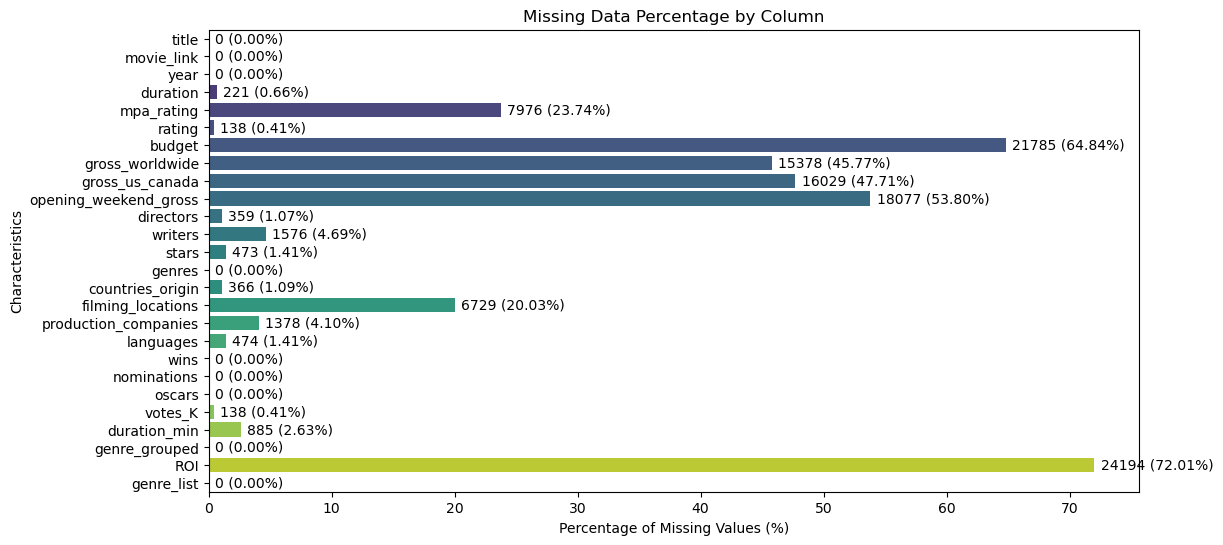

In [205]:
#Missing values according to characteristics 

missing_values = merged_df.isna().sum()
missing_percent = (missing_values / len(merged_df)) * 100

missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Count': missing_values.values, 'Missing %': missing_percent.values})

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df["Missing %"], y=missing_df["Column"], palette="viridis")

for i, row in missing_df.iterrows():
    plt.text(row['Missing %'] + 0.5, i, f"{row['Missing Count']} ({row['Missing %']:.2f}%)", 
             va='center', ha='left', color='black', fontsize=10)
    
plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Characteristics")
plt.title("Missing Data Percentage by Column")
plt.show()

This dataset contains a significant amount of missing values, particularly in key financial fields such as budget and grossWorldWide. Since these fields are crucial for analyzing box office performance and profitability, we must be extremely cautious when drawing conclusions.

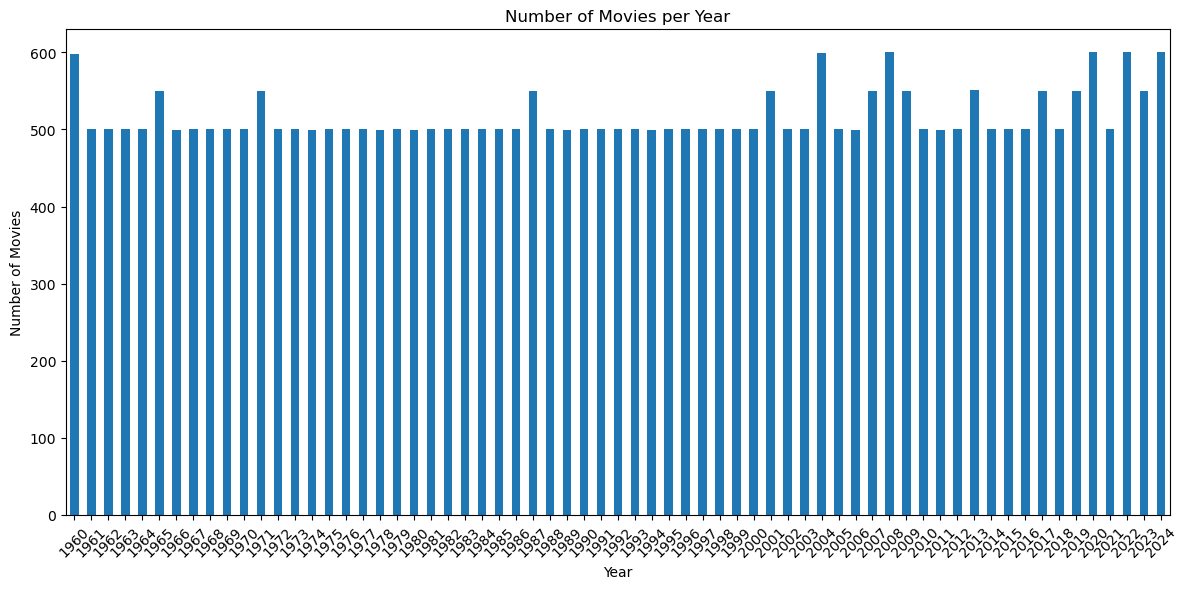

In [188]:
# Number of movies per year 

movies_per_year = merged_df.groupby("year").size()

# Plotting the data
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')

# Adding titles and labels
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\1833177006.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = merged_df.groupby("year").apply(lambda x: x.isnull().sum().sum())  # Total missing values per year


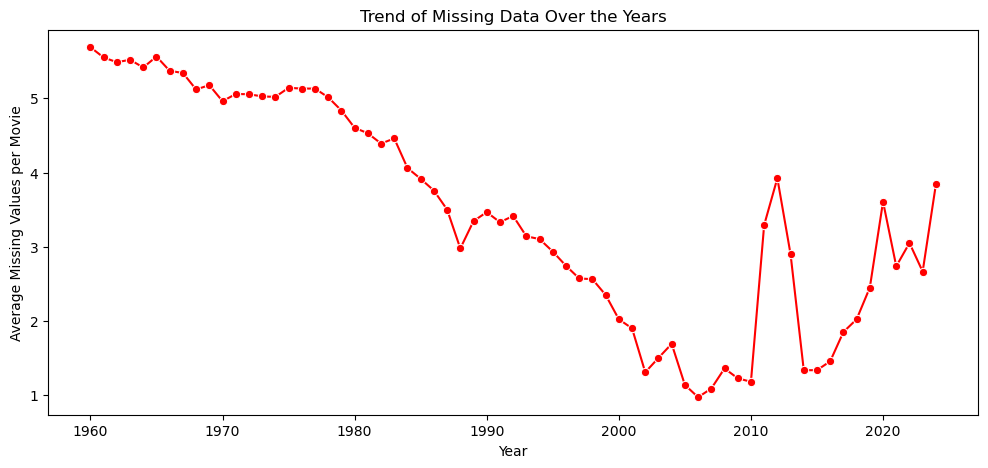

In [189]:
#Trend of Missing Data Over the Years

missing_by_year = merged_df.groupby("year").apply(lambda x: x.isnull().sum().sum())  # Total missing values per year
missing_by_year = missing_by_year / merged_df.groupby("year").size()  # Normalize by number of movies that year

# Plot missing data trend over the years
plt.figure(figsize=(12, 5))
sns.lineplot(x=missing_by_year.index, y=missing_by_year, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Average Missing Values per Movie")
plt.title("Trend of Missing Data Over the Years")
plt.show()

The dataset considers consistently around 500–600 movies per year. The number of missing values decreases between 1960 and 2010, with a noticeable spike at the beginning of the 2010s. Since then, there has been a growing trend of missing values.Those missing values may impact the reliability of analyses thus we have to remain cautious when drawing conclusions, especially when dealing with years that have a higher frequency of missing values.

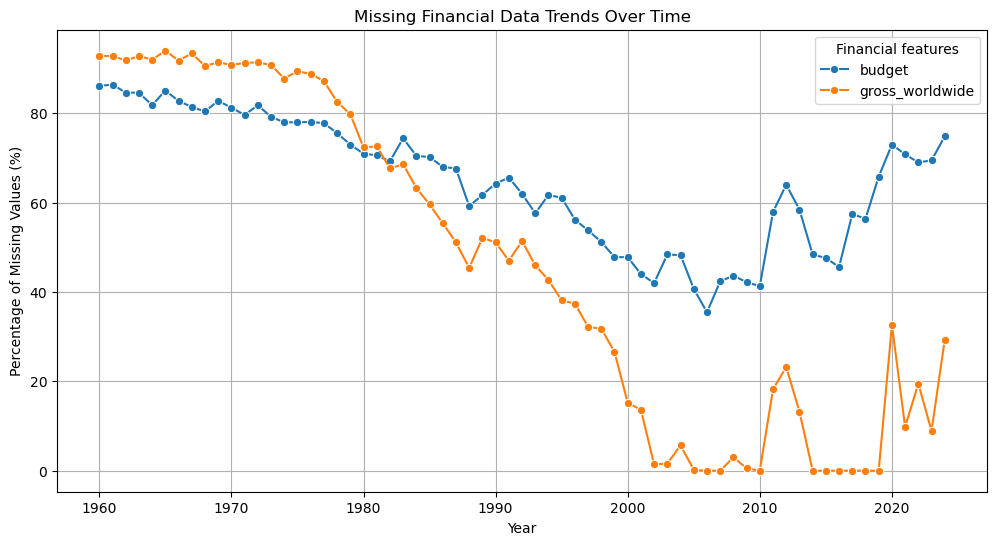

In [190]:
financial_cols = ['budget', 'gross_worldwide']

missing_financial = merged_df.groupby('year')[financial_cols].apply(lambda x: x.isna().mean() * 100)

plt.figure(figsize=(12, 6))
for col in financial_cols:
    sns.lineplot(x=missing_financial.index, y=missing_financial[col], label=col, marker='o')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Missing Values (%)")
plt.title("Missing Financial Data Trends Over Time")
plt.legend(title="Financial features")
plt.grid(True)

plt.show()

We observe that, even though we need to be cautious with the increasing missing values in recent years, the grossWorldWide data is actually quite well-covered overall. However, budget and grossWorldWide data are particularly unreliable before the 2000s, with a significantly high proportion of missing values.

In [191]:
# Analyze unrealistic values (eg.negative budget, extremely high outliers...) 

cols = ['rating','votes_K', 'budget', 'gross_worldwide', 'duration_min', 'wins', 'nominations', 'oscars']

# all the values should be positive 
for c in cols:
    num_negatives = (merged_df[c] < 0).sum()
    if num_negatives > 0:
        print(f"Found {num_negatives} negative values in {c}. Replacing with NaN.")
        merged_df[c] = merged_df[c].apply(lambda x: np.nan if x < 0 else x)

### Some insights 

Let's deeper understand each caracterictics of our dataset.

#### Genre

In [131]:
!pip install wordcloud
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

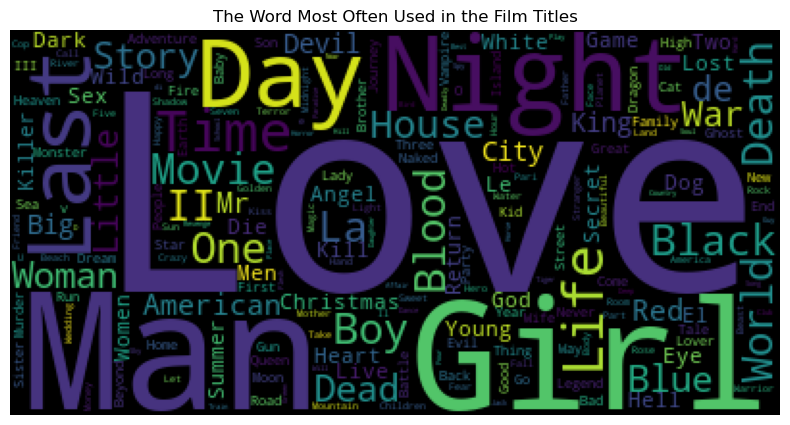

In [192]:
title_word = merged_df['title'].astype(str).to_numpy()
title_words = ""
for array in title_word:
    array_str = "".join(map(str, array))
    title_words += array_str + " "

wc = WordCloud().generate(title_words)
plt.figure(figsize=(12,5))
plt.imshow(wc)
plt.title("The Word Most Often Used in the Film Titles")
plt.axis(False)

The frequent appearance of words like "Love," "Girl," "Man," "Time," "Last," "Night" in movie titles suggests a strong presence of romantic, drama, or emotional themes in the top 500-600 films. Let's analyze deeper the genres of the films in our dataset to understand their distribution and trends.

In [193]:
from collections import Counter

In [194]:
# Overal Genre distribution

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\3771711800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x="Count", y="Genre", palette="viridis")


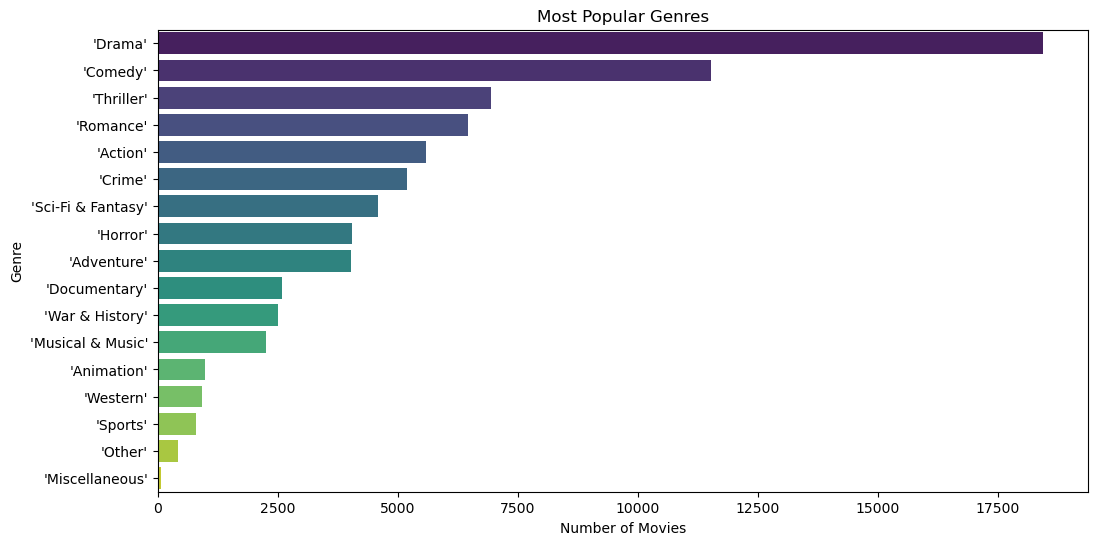

In [195]:
merged_df["genre_grouped"] = merged_df["genre_grouped"].astype(str)

genre_counts = Counter([genre for sublist in merged_df["genre_grouped"].str.strip('[]').str.split(', ') for genre in sublist])
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x="Count", y="Genre", palette="viridis")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Most Popular Genres")
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\1123032700.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_gross, x='gross_worldwide', y='genre_list', palette="viridis")


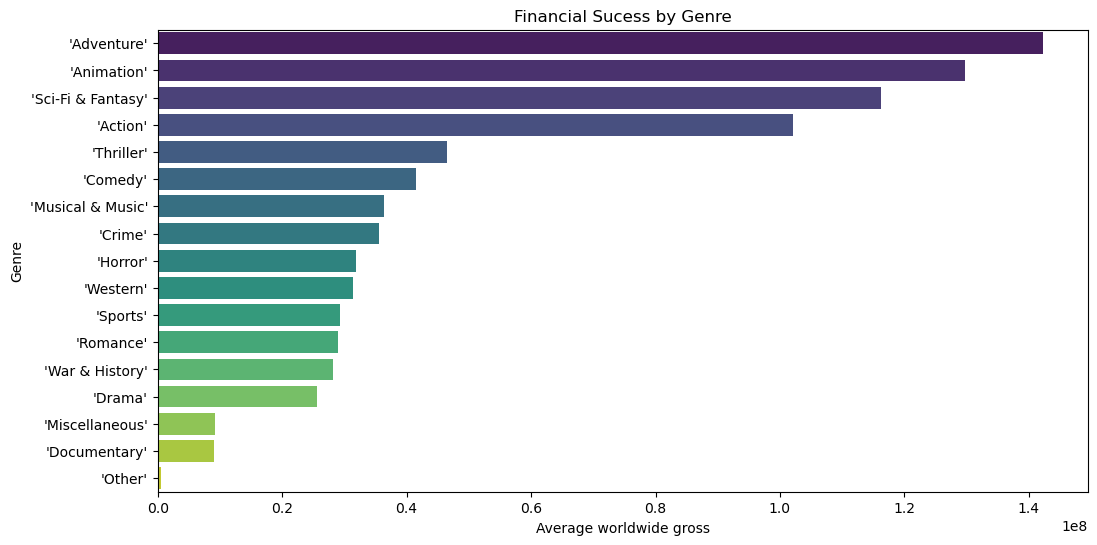

In [197]:
# Genre and Financial Sucess

merged_df['genre_list'] = merged_df["genre_grouped"].str.strip('[]').str.split(', ')
exploded_genres = merged_df.explode('genre_list')
genre_gross = exploded_genres.groupby('genre_list')['gross_worldwide'].mean().reset_index()
genre_gross = genre_gross.sort_values(by='gross_worldwide', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_gross, x='gross_worldwide', y='genre_list', palette="viridis")
plt.xlabel("Average worldwide gross")
plt.ylabel("Genre")
plt.title("Financial Sucess by Genre")
plt.show()

Although drama is the most represented genre in terms of the number of films, it is not the genre with the highest gross earnings. In fact, genres like adventure generate much higher revenues, despite their lower representation in the dataset. However, it’s important to note that a deeper analysis is needed to evaluate the return on investment (ROI) for each genre. By comparing revenues to budgets, a clearer picture of the genre’s profitability could emerge. For example, a genre with a lower budget but high revenues could have a better ROI, even if it generates less in absolute revenue.

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\2184468343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_ROI, x='ROI', y='genre_list', palette="viridis")


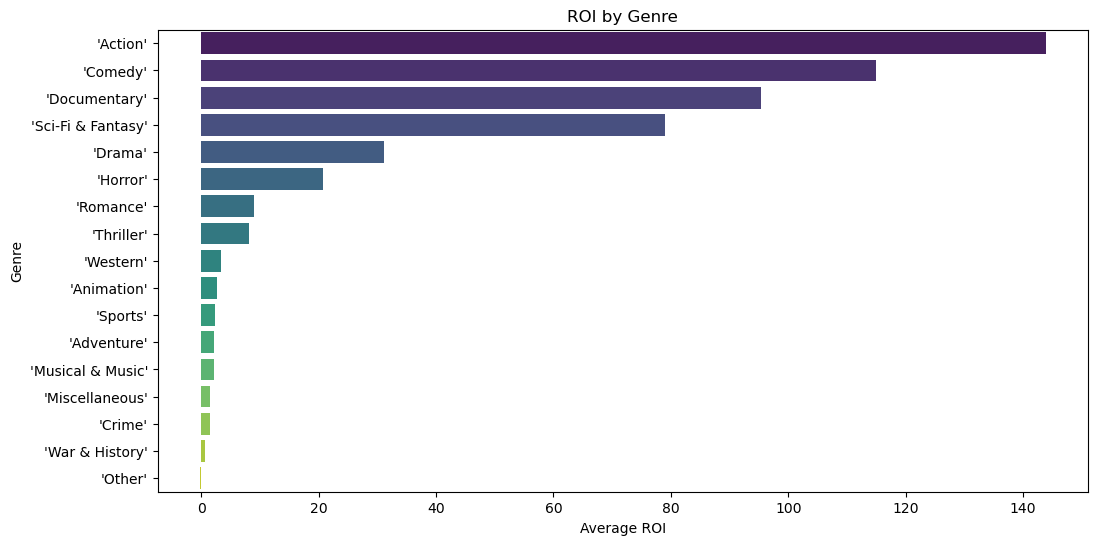

In [221]:
#Genre and ROI

genre_ROI = exploded_genres.groupby('genre_list')['ROI'].mean().reset_index()
genre_ROI = genre_ROI.sort_values(by='ROI', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_ROI, x='ROI', y='genre_list', palette="viridis")
plt.xlabel("Average ROI")
plt.ylabel("Genre")
plt.title("ROI by Genre")
plt.show()

The genre with the highest ROI is Action, which stands out in terms of profitability when compared to other genres. However, this does not necessarily correlate with the genres that are most represented or the highest in terms of financial success. 

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\1069092364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_rating, x='rating', y='genre_list', palette="viridis")


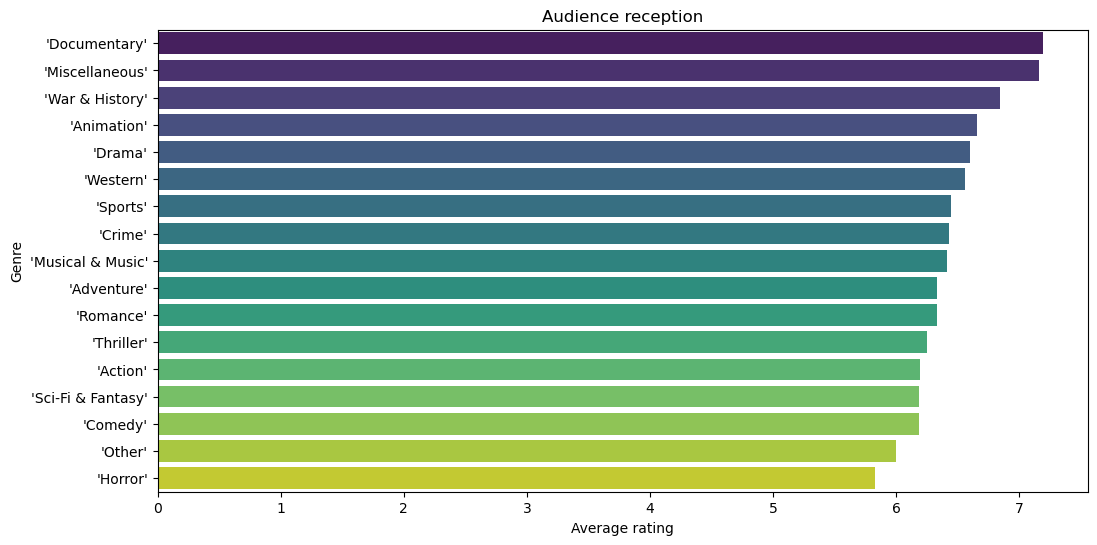

In [220]:
# Genre and Ratings 

genre_rating = exploded_genres.groupby('genre_list')['rating'].mean().reset_index()
genre_rating = genre_rating.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_rating, x='rating', y='genre_list', palette="viridis")
plt.xlabel("Average rating")
plt.ylabel("Genre")
plt.title("Audience reception")
plt.show()

When plotting the best-rated genres, we notice that genres like 'Documentary' rank at the top. This suggests that the critical ratings and audience votes do not always align with financial success.

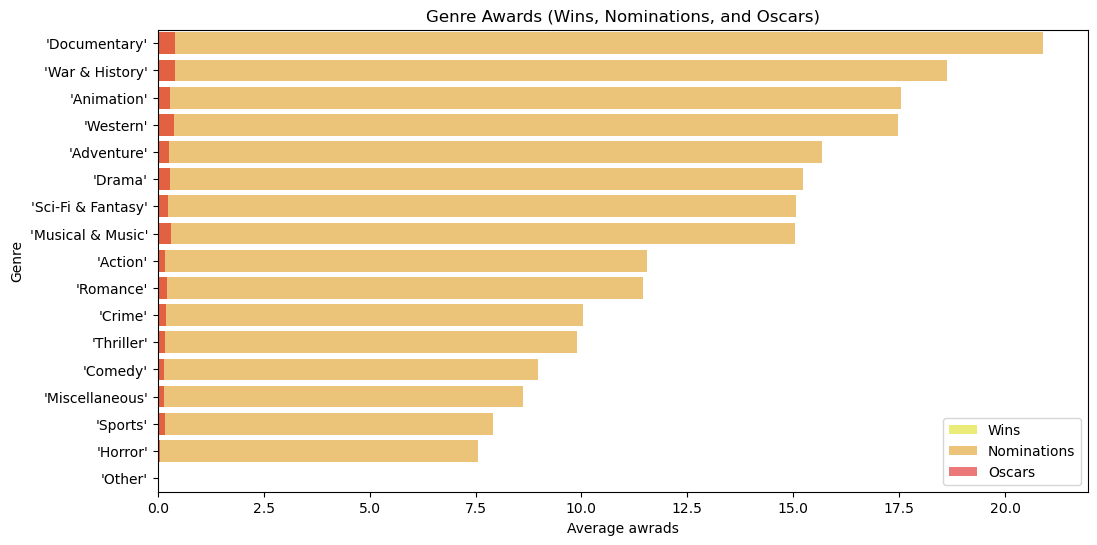

In [222]:
# Genre and Awards (oscars, wins, nominations) 

genre_wins = exploded_genres.groupby('genre_list')['wins'].mean().reset_index()
genre_nominations = exploded_genres.groupby('genre_list')['nominations'].mean().reset_index()
genre_oscars = exploded_genres.groupby('genre_list')['oscars'].mean().reset_index()

genre_awards = genre_wins.merge(genre_nominations, on='genre_list', suffixes=('_wins', '_nominations'))
genre_awards = genre_awards.merge(genre_oscars, on='genre_list')
genre_awards = genre_awards.sort_values(by='nominations', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=genre_awards, x='wins', y='genre_list', color='yellow', label="Wins", alpha=0.6)
sns.barplot(data=genre_awards, x='nominations', y='genre_list', color='orange', label="Nominations", alpha=0.6)
sns.barplot(data=genre_awards, x='oscars', y='genre_list', color='red', label="Oscars", alpha=0.6)
plt.xlabel("Average awrads")
plt.ylabel("Genre")
plt.title("Genre Awards (Wins, Nominations, and Oscars)")
plt.show()

The awards (wins, nominations, and oscars) seem to agree with the ratings of the genres, as genres with higher ratings tend to also have a higher average count of wins, nominations, and oscars. This suggests that critically successful films often also perform well in terms of industry recognition

#### Financial Performance

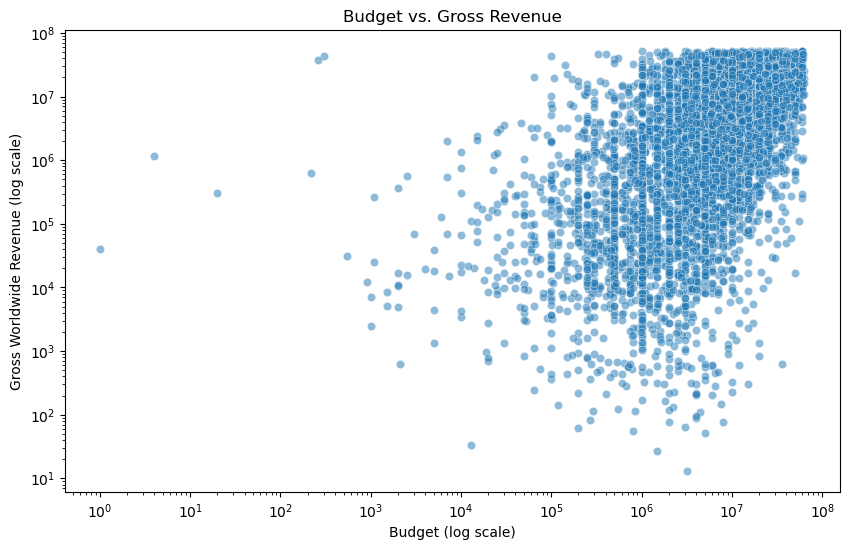

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="budget", y="gross_worldwide", alpha=0.5)
plt.xscale("log")  # Log scale to handle large value differences
plt.yscale("log")
plt.xlabel("Budget (log scale)")
plt.ylabel("Gross Worldwide Revenue (log scale)")
plt.title("Budget vs. Gross Revenue")
plt.show()

When plotting the relationship between budget and gross, it's noticeable that most of the points are concentrated in the top-right corner of the plot. This suggests a trend where movies with higher budgets tend to have higher gross worldwide earnings. It reflects the common pattern seen in blockbuster films, where large budgets often correlate with significant box-office success.
Nevertheless, there are some outliers in the plot. These outliers represent movies that, despite having a high budget, did not perform as expected at the box office, or conversely, movies with a relatively low budget that achieved massive financial success.

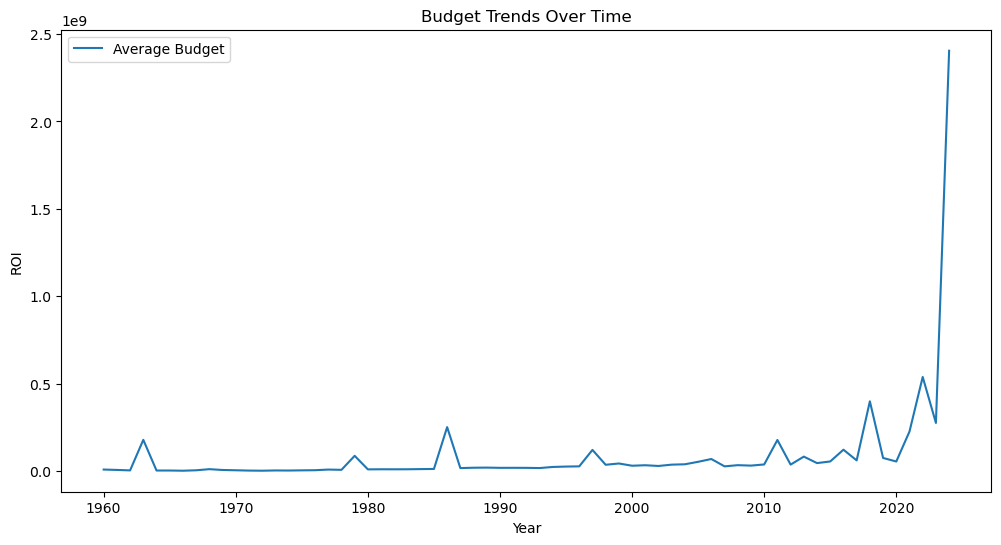

In [226]:
#Budget and ROI Trends

yearly_data = merged_df.groupby('year')[['budget']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='year', y='budget', label='Average Budget')

plt.xlabel('Year')
plt.ylabel('ROI')
plt.title('Budget Trends Over Time')
plt.legend()
plt.show()

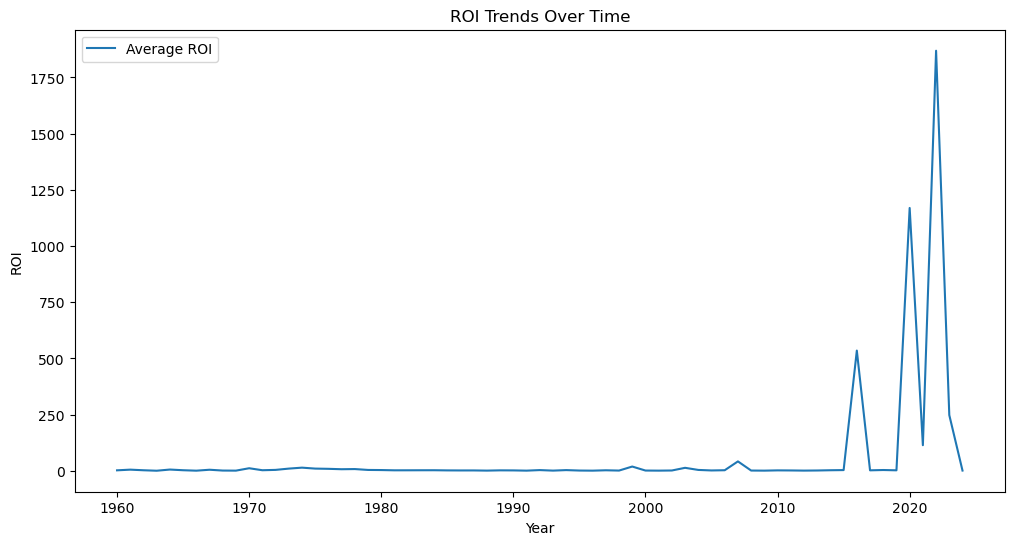

In [227]:
yearly_data = merged_df.groupby('year')[['ROI']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='year', y='ROI', label='Average ROI')

plt.xlabel('Year')
plt.ylabel('ROI')
plt.title('ROI Trends Over Time')
plt.legend()
plt.show()

Budget and ROI seem to have exploded recently. 

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\2258080579.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=merged_df,  x='log_budget', y='rating', palette='viridis')


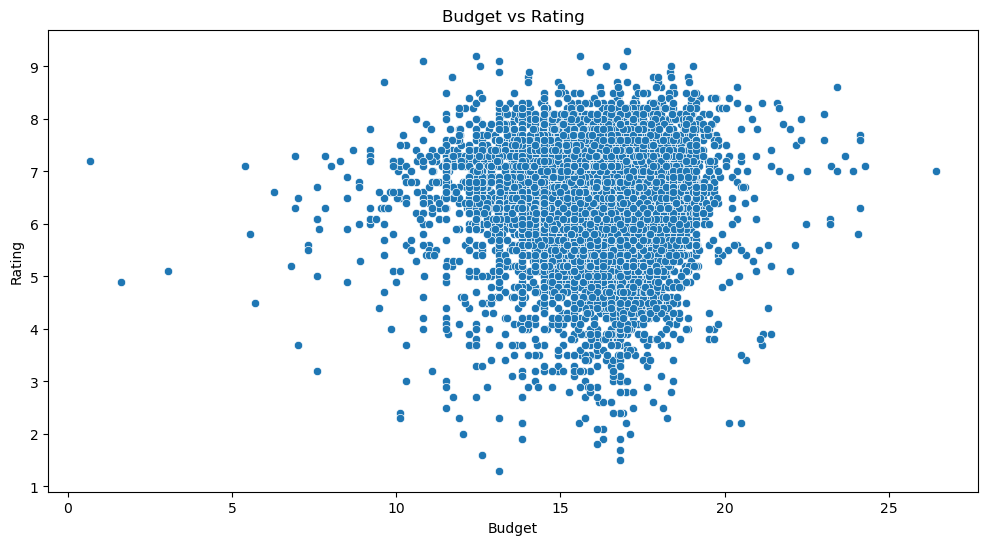

In [232]:
#Budget and Rating

merged_df['log_budget'] = np.log1p(merged_df['budget'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df,  x='log_budget', y='rating', palette='viridis')
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.title("Budget vs Rating")
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\2824644137.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=merged_df, x='log_budget', y='oscars', palette='viridis')


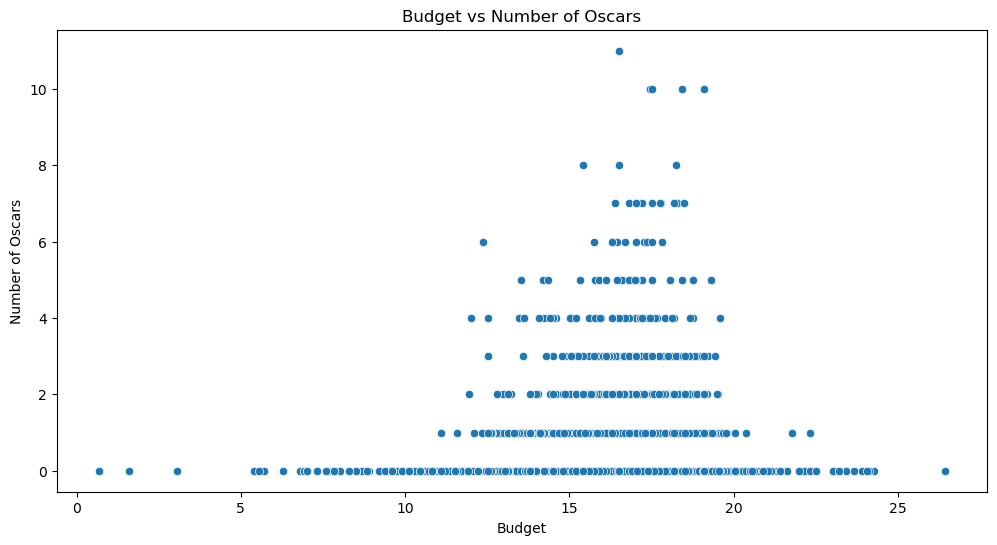

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\2824644137.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=merged_df, x='log_budget', y='nominations', palette='viridis')


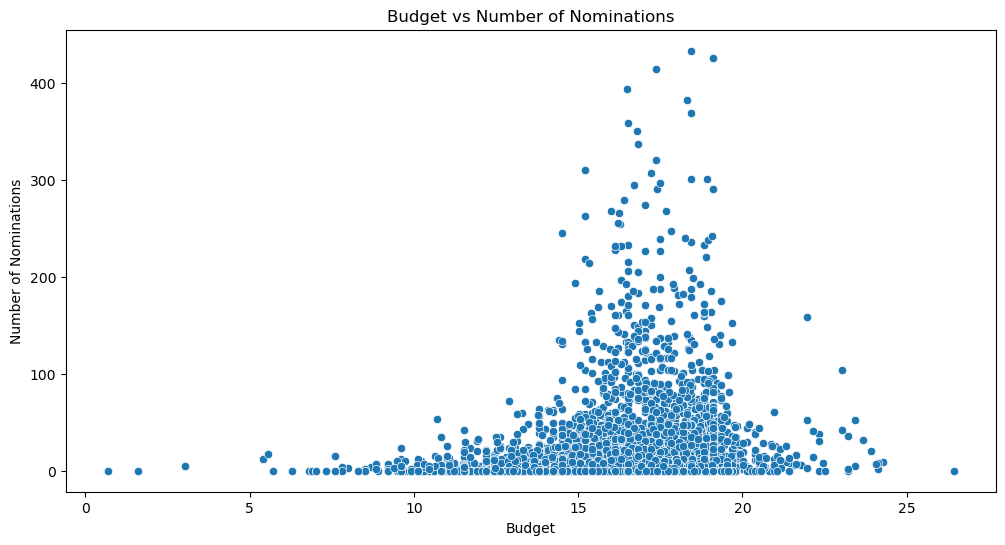

In [235]:
#Budget and adwards

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='log_budget', y='oscars', palette='viridis')
plt.xlabel("Budget")
plt.ylabel("Number of Oscars")
plt.title("Budget vs Number of Oscars")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='log_budget', y='nominations', palette='viridis')
plt.xlabel("Budget")
plt.ylabel("Number of Nominations")
plt.title("Budget vs Number of Nominations")
plt.show()


Even though higher budgets tend to correlate with more awards, it’s important to note that the movies with the most awards are not necessarily the ones with the highest budgets. While the average does shift slightly towards the right (indicating that higher-budget films tend to have more awards), there are exceptions. Many films with modest budgets can also achieve significant recognition, and there are blockbuster films that may not perform as well in terms of awards.

#### Country

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\2936111851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_df.head(20), x="Count", y="Country", palette="viridis")


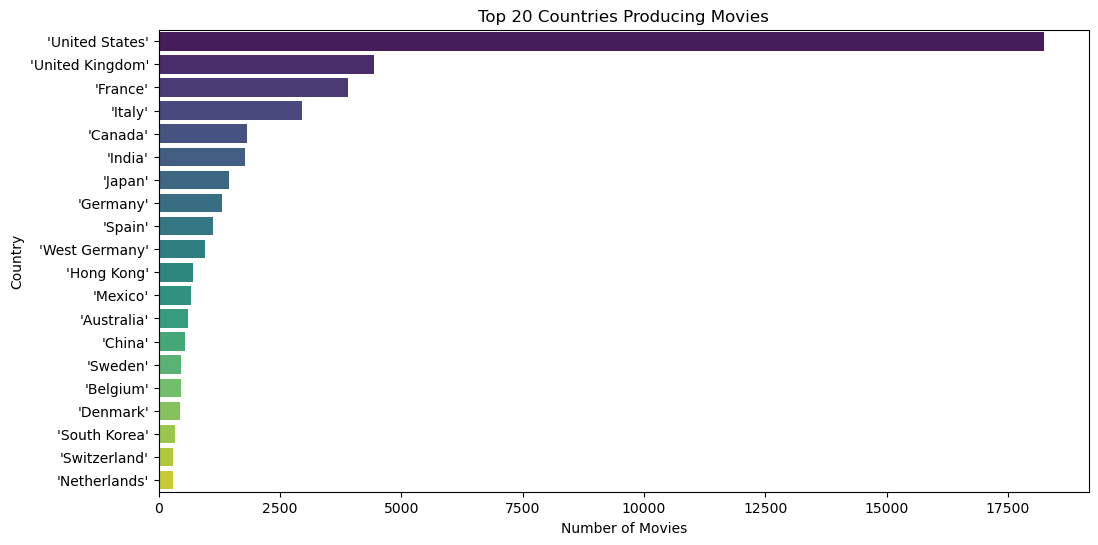

In [260]:
country_counts = Counter([country for sublist in merged_df["countries_origin"].dropna().str.strip('[]').str.split(', ') for country in sublist])
country_df = pd.DataFrame(country_counts.items(), columns=["Country", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=country_df.head(20), x="Count", y="Country", palette="viridis")  
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.title("Top 20 Countries Producing Movies")
plt.show()

Unsurprisingly, the United States dominates the film market, with Switzerland coming in at 20th position

C:\Users\charl\AppData\Local\Temp\ipykernel_23080\3909075838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df.head(20), x="Count", y="Language", palette="viridis")


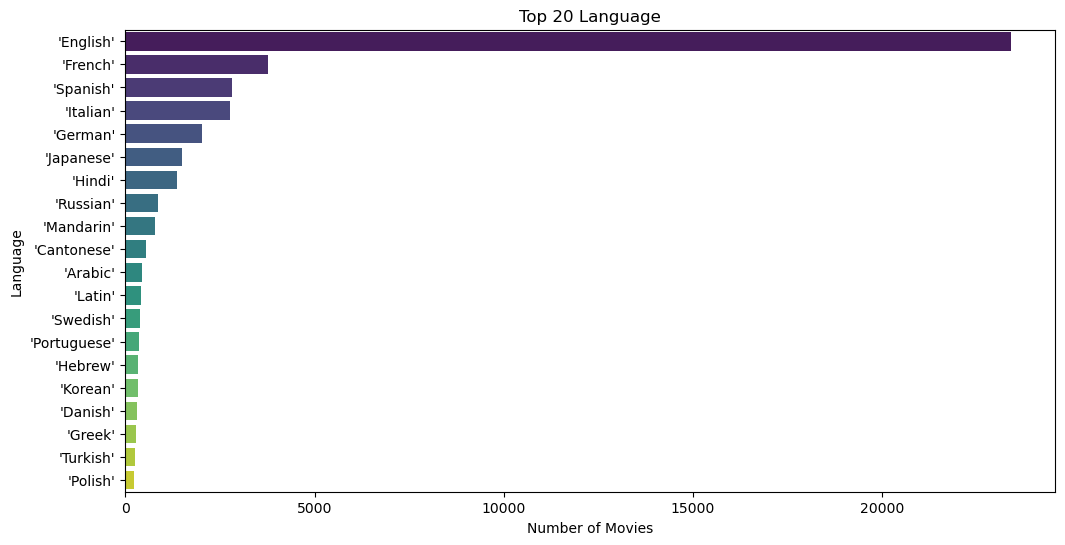

In [263]:
language_counts = Counter([language for sublist in merged_df["languages"].dropna().str.strip('[]').str.split(', ') for language in sublist])
language_df = pd.DataFrame(language_counts.items(), columns=["Language", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=language_df.head(20), x="Count", y="Language", palette="viridis")  
plt.xlabel("Number of Movies")
plt.ylabel("Language")
plt.title("Top 20 Language")
plt.show()

Not a big surprise, we won't continue analyzing this as it's quite clear that the dominance of the English-speaking world in film culture is evident.

#### Duration

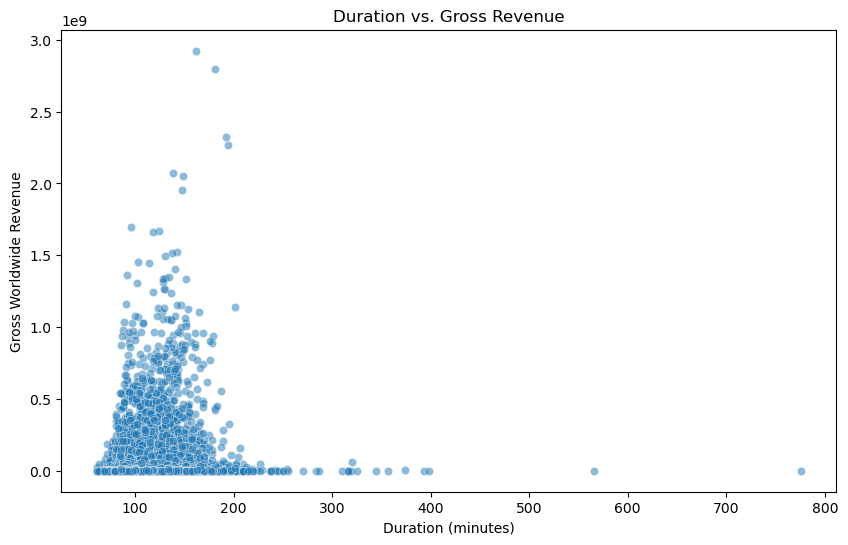

In [265]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="duration_min", y="gross_worldwide", alpha=0.5)
plt.xlabel("Duration (minutes)")
plt.ylabel("Gross Worldwide Revenue")
plt.title("Duration vs. Gross Revenue")
plt.show()

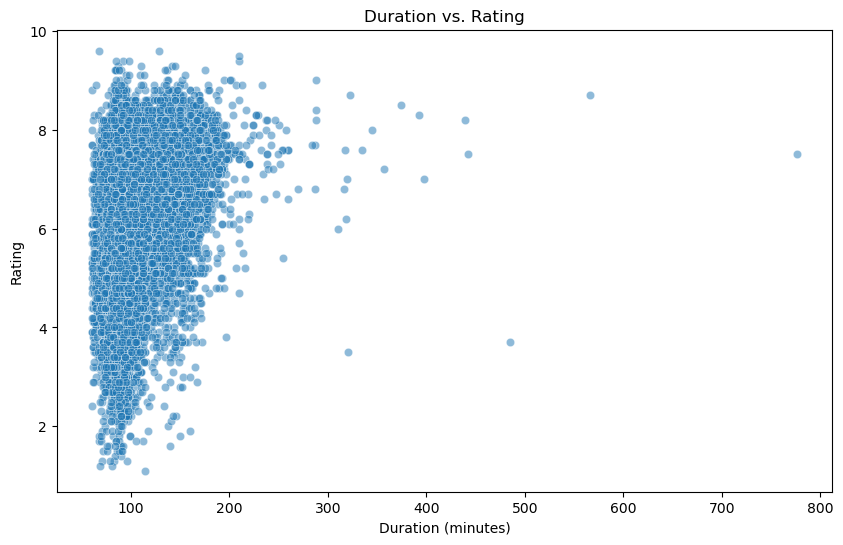

In [266]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="duration_min", y="rating", alpha=0.5)
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.title("Duration vs. Rating")
plt.show()

In [267]:
#commentaire? 

#### Differents definition of sucess

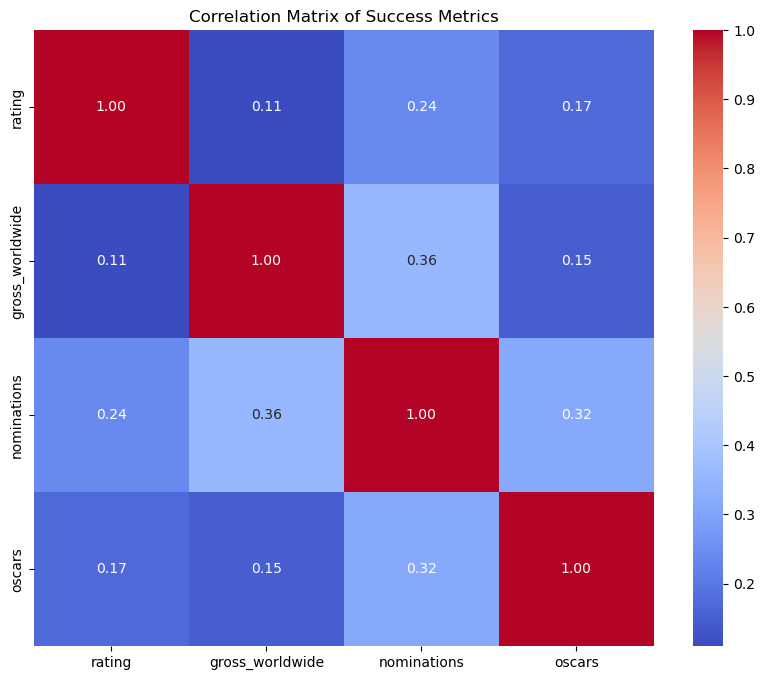

In [271]:
success_columns = ['rating', 'gross_worldwide', 'nominations', 'oscars']

correlation_matrix = merged_df[success_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Success Metrics")
plt.show()

The correlation between *rating* and *gross_worldwide* is quite low (0.11). This suggests that there is very little relationship between a movie's audience rating and its financial success. In other words, a movie with a high *rating* doesn't necessarily lead to a high *gross worldwide*.

The correlation between *rating* and *nominations* is a bit stronger (0.24), but still weak. This suggests that there is a mild positive relationship between a movie's rating and the number of *nominations* it receives. In other words, movies with higher ratings tend to get nominated for more awards, but it's not a very strong correlation.

 
The correlation between *gross_worldwide* and *nominations* is moderate (0.36). This suggests that movies that make more money tend to receive more *nominations*. Financial success might make a movie more visible and thus increase its chances of being nominated for awards.

The correlation between *gross_worldwide* and *oscars*is weak (0.15). This indicates that there is not much of a relationship between a movie's box office revenue and whether it wins *oscars*. A high-grossing film is not necessarily a *Oscar* winner.

This implies that *financial success*, *audience reception*, and *awards* are somewhat independent of each other, and while there may be some overlap, achieving success in one area (like gross revenue) does not guarantee success in others (like awards or high ratings).

#### Conclusion

In this exploratory analysis of movie data, we've examined various factors, including genre distribution, financial success, audience reception, awards... however it's important to note that the data's missing values limit the accuracy of our conclusions.

## 4. Related Work

Several research studies have explored movie success factors. Some key references include:

- [Early Predictions of Movie Success](https://www.biz.uiowa.edu/faculty/kangzhao/pub/JMIS_2016.pdf): the Who, What, and When of Profitability, Michael T. Lash and Kang Zhao (2016)
This research focuses on predicting the profitability of a movie to support movie investment decisions at early stages of film production. By leveraging data from various sources, and using social network analysis and text mining techniques, the proposed system extracts several types of features, including “who” are on the cast, “what” a movie is about, “when” a movie will be released, as well as “hybrid” features. Experiment results showed that the system outperforms benchmark methods by a large margin. Novel features we proposed also made great contributions to the prediction. In addition to designing a decision support system with practical utilities, we also analyzed key factors for movie profitability. Furthermore, we demonstrated the prescriptive value of our system by illustrating how it can be used to recommend a set of profit-maximizing cast members. This research highlights the power of predictive and prescriptive data analytics for information systems to aid business decisions.

- Eliashberg et al. (2006): Predicting movie success using machine learning models.
- Ghiassi et al. (2015): The impact of marketing strategies on movie profitability.
- IMDB Research: Various case studies on user ratings and audience engagement.

Our project will build upon these works by leveraging a larger dataset spanning over 60 years, incorporating both financial and audience-based metrics to derive insights into long-term trends in the film industry.

#### Data vis inspiration